<a href="https://colab.research.google.com/github/Pzareian/Image-Crawler/blob/master/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
dataset = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
len(train_labels)

50000

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)

10000

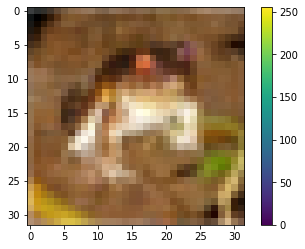

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

TypeError: ignored

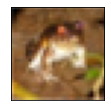

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
tmp = [train_labels[i][0] for i in range(len(train_labels))] 

train_labels = np.asarray(tmp)

In [ ]:
tmp = [test_labels[i][0] for i in range(len(test_labels))] 

test_labels = np.asarray(tmp)

In [ ]:
model = keras.Sequential([

    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32, 32, 3)),

    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,(3,3),activation='relu'),

    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,(3,3),activation='relu'),

    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(10)

])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5259 - accuracy: 0.4458
Epoch 2/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1474 - accuracy: 0.5956
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9982 - accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9040 - accuracy: 0.6856
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8306 - accuracy: 0.7092
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7730 - accuracy: 0.7305
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7251 - accuracy: 0.7469
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6825 - accuracy: 0.7618
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6429 - accuracy: 0.7734
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.8701 - accuracy: 0.7076

Test accuracy: 0.7075999975204468


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([9.9391371e-05, 1.3298295e-02, 1.3758437e-03, 5.8525324e-01,
       5.9276674e-04, 2.5695901e-02, 3.6600608e-01, 1.2023943e-03,
       5.9436215e-03, 5.3245749e-04], dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
test_labels[0]

3

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

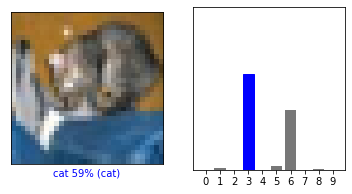

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

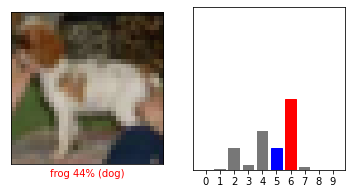

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

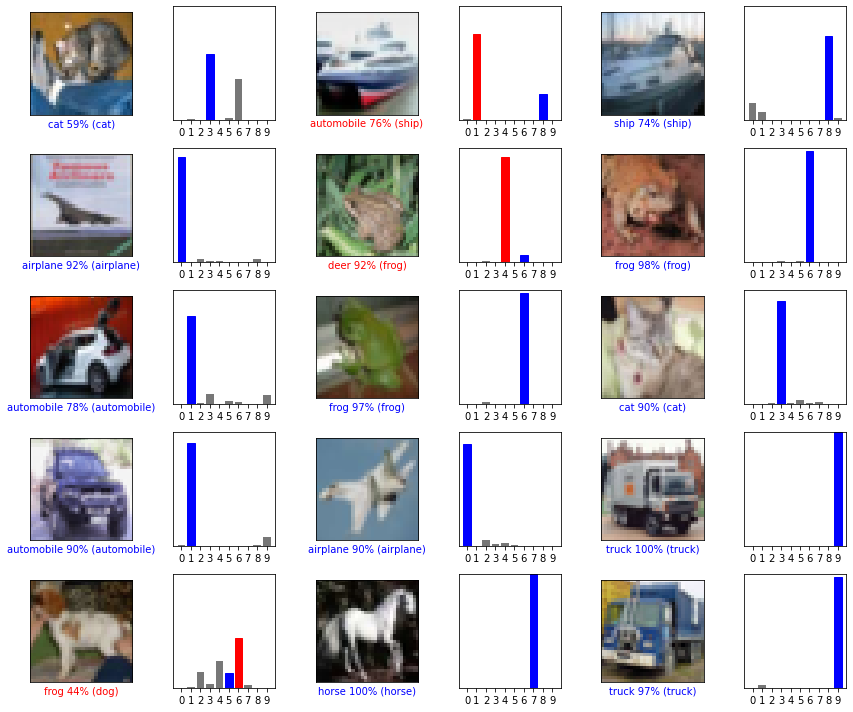

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.4859079e-03 7.6197213e-01 2.8311558e-06 1.4739214e-06 8.2180009e-07
  6.5572368e-07 1.6089855e-07 1.5267872e-06 2.2776267e-01 7.7186991e-04]]


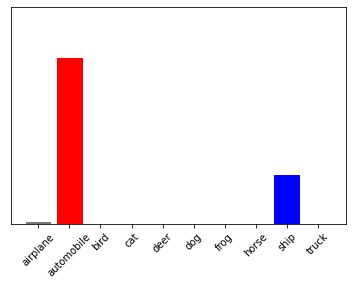

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

1

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 